# 50_Startups

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
import sweetviz as sv

In [9]:
data1=pd.read_csv("50_Startups.csv")
data2=data1.rename({'R&D Spend':'rd_spend','Marketing Spend':'market_spend'},axis=1)
df1=pd.DataFrame(data2)
df1.head()

,rd_spend,Administration,market_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rd_spend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   market_spend    50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df1.isna().sum()

rd_spend          0
Administration    0
market_spend      0
State             0
Profit            0
dtype: int64

## Correlation

In [12]:
df1.corr()

,rd_spend,Administration,market_spend,Profit
rd_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
market_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Scatter plots between variables

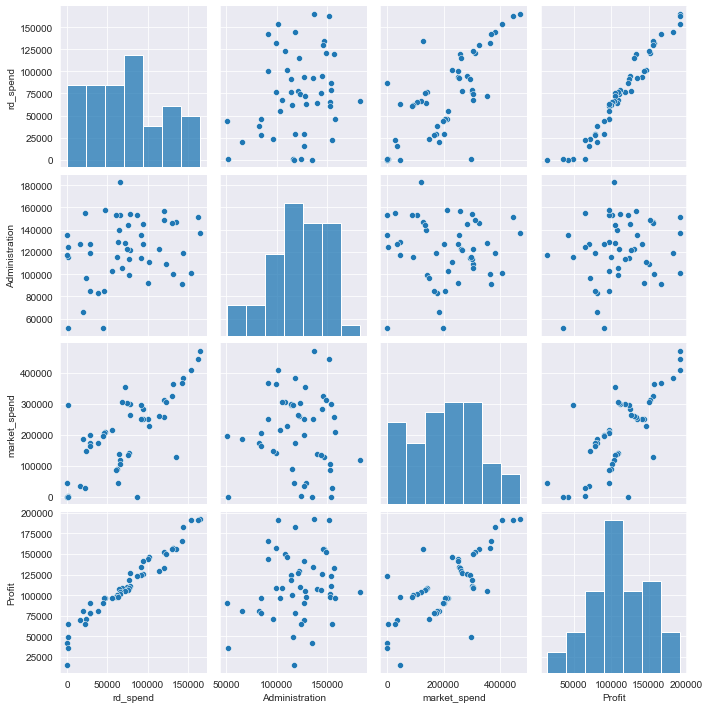

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Transformation

## Creating dummy variable for state column

In [8]:
data2=pd.get_dummies(df1,columns=['State'])
data2.head(10)

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [9]:
data2=data2.dropna()
data2.head()

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Normalizing the Data

In [10]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [11]:
data2.head().values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00]])

In [12]:
array = data2.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.65 1.   1.   0.  ]
 [0.98 0.76 0.94 1.   1.  ]
 [0.93 0.38 0.86 0.99 0.  ]
 [0.87 0.51 0.81 0.95 0.  ]
 [0.86 0.31 0.78 0.85 0.  ]]


In [13]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array = data2.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.02  0.56  2.15  2.01 -0.72 -0.69  1.39]
 [ 1.96  1.08  1.92  2.    1.39 -0.69 -0.72]
 [ 1.75 -0.73  1.63  1.98 -0.72  1.46 -0.72]
 [ 1.55 -0.1   1.42  1.78 -0.72 -0.69  1.39]
 [ 1.5  -1.08  1.28  1.36 -0.72  1.46 -0.72]]


In [14]:
data2.describe()

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


# Preparing a Model

## Build Model

In [13]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
model = smf.ols('Profit~rd_spend+Administration+market_spend',data=df1).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        21:10:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Coefficients

In [16]:
model.params

Intercept         50122.192990
rd_spend              0.805715
Administration       -0.026816
market_spend          0.027228
dtype: float64

### t-values and p-values

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
rd_spend          17.846374
Administration    -0.525507
market_spend       1.655077
dtype: float64 
 Intercept         1.057379e-09
rd_spend          2.634968e-22
Administration    6.017551e-01
market_spend      1.047168e-01
dtype: float64


### R-squared value

In [18]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


## Q-Q Plot

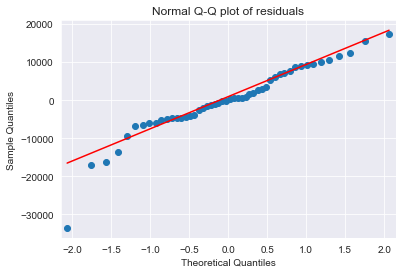

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot

eval_env: 1


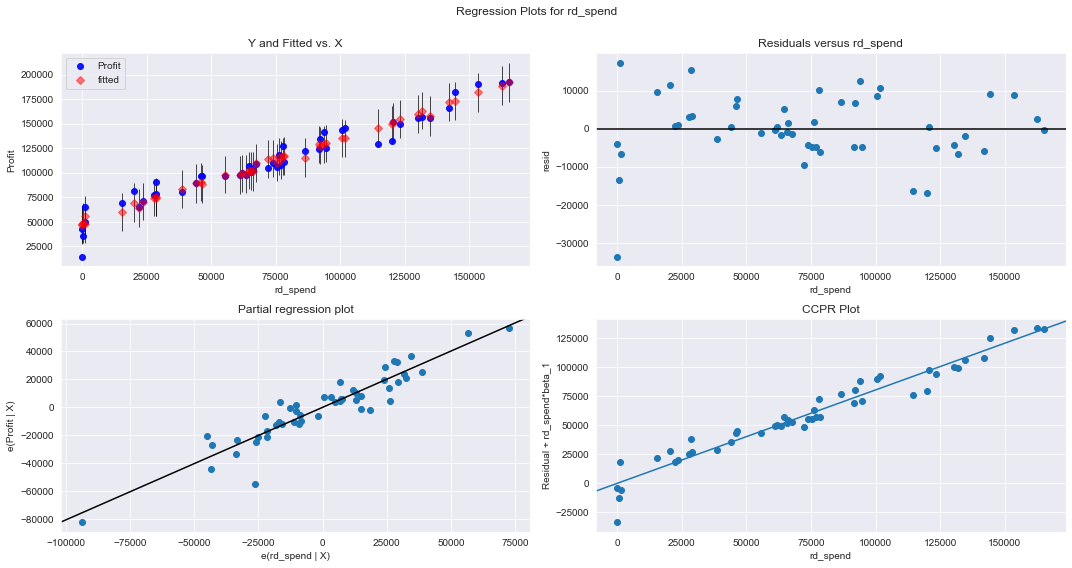

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd_spend", fig=fig)
plt.show()

eval_env: 1


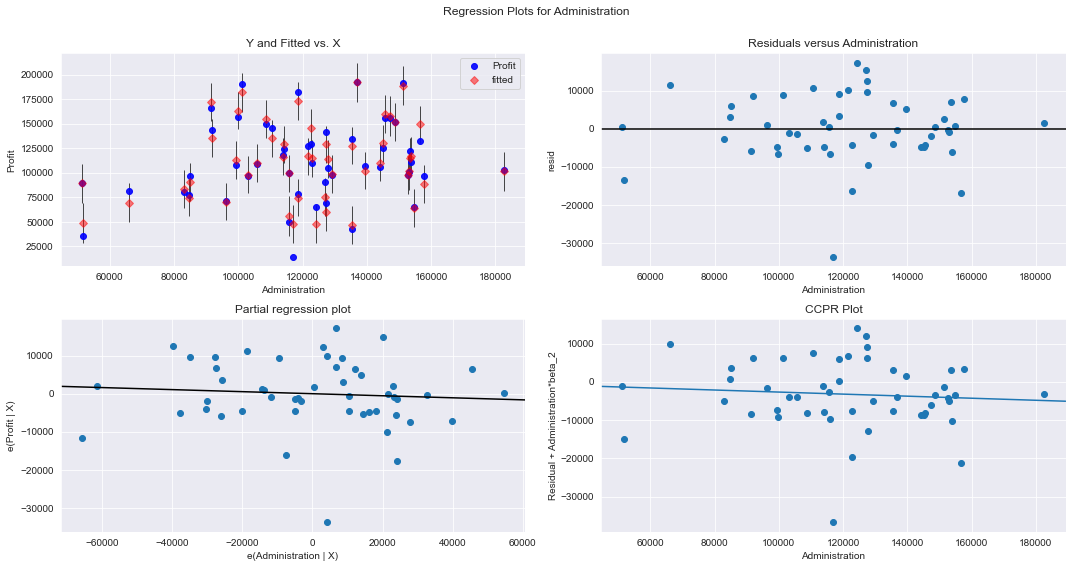

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


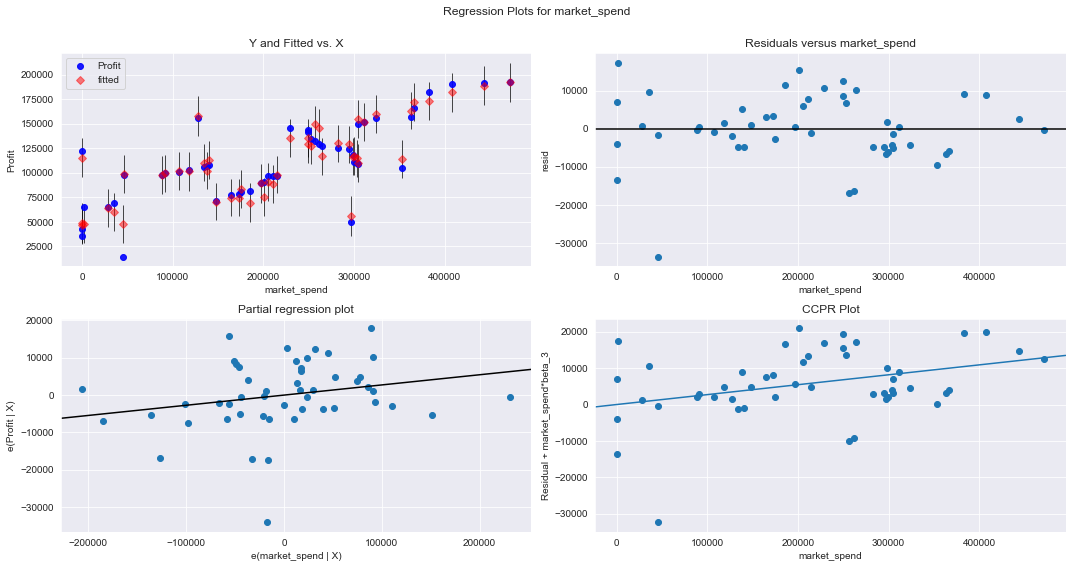

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "market_spend", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook’s Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

## Plot the influencers values using stem plot

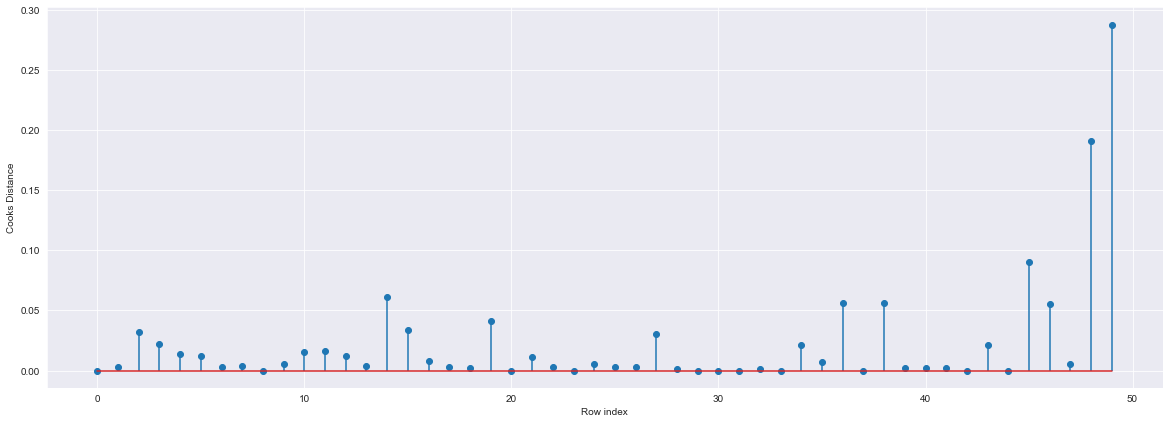

In [33]:
%matplotlib inline
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Index and value of influencer where c is more than .5

In [34]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

## High influence point

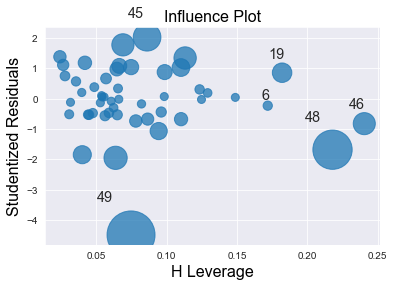

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
data2[data2.index.isin([48,49])]

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [37]:
df2=data2.drop(data2.index[49],axis=0)
df2.head()

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [38]:
df3=df2.reset_index()
df3.head()

,index,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [39]:
df4=df3.drop(['index'],axis=1)
df4.head()

,rd_spend,Administration,market_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [40]:
model2 = smf.ols('Profit~rd_spend+Administration+market_spend',data=df4).fit()

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           8.85e-32
Time:                        21:12:08   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd_spend           0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
market_spend       0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_influence_v=model2.get_influence()
(c_v,_)=model_influence_v.cooks_distance

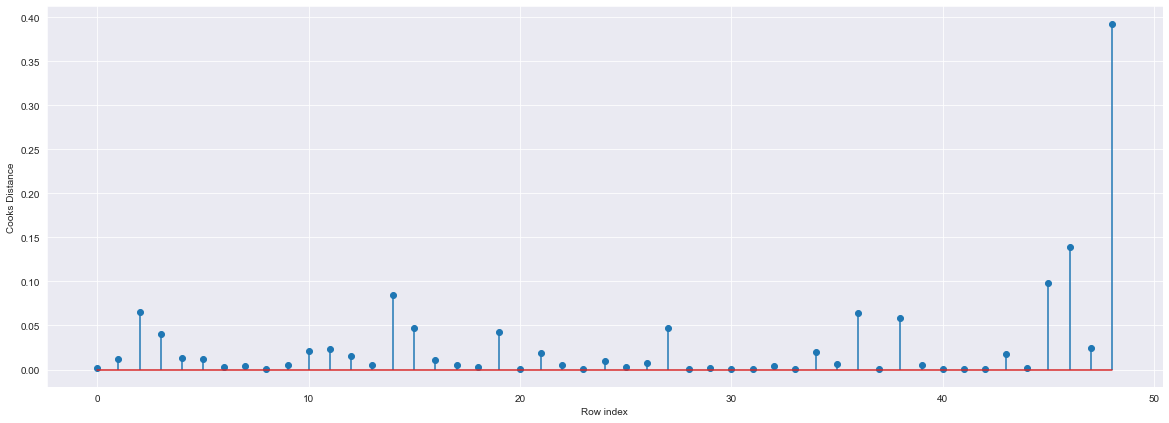

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c_v, 6))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c_v),np.max(c_v))

(48, 0.39274420556321504)

### Checking accuracy of model

In [45]:
final_model=smf.ols('Profit~rd_spend+Administration+market_spend',data=df4).fit()
(final_model.rsquared, final_model.aic)

(0.9613162435129848, 1020.5652974526366)

## Since r-squared value is greater than 0.8 i.e., 0.97, hence it is a good model.

# Toyota Corolla

In [46]:
data4=pd.read_csv("Toyota_Corolla.csv",encoding="ISO-8859-1")
df5=pd.DataFrame(data4)
df5.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [47]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [48]:
data5=df5.iloc[:,[2,3,6,8,12,13,15,16,17]]
data6=data5.rename({'Age_08_04':'Age'},axis=1)
data6.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [49]:
data6.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

## Correlation

In [50]:
data6.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Scatter plots between variables

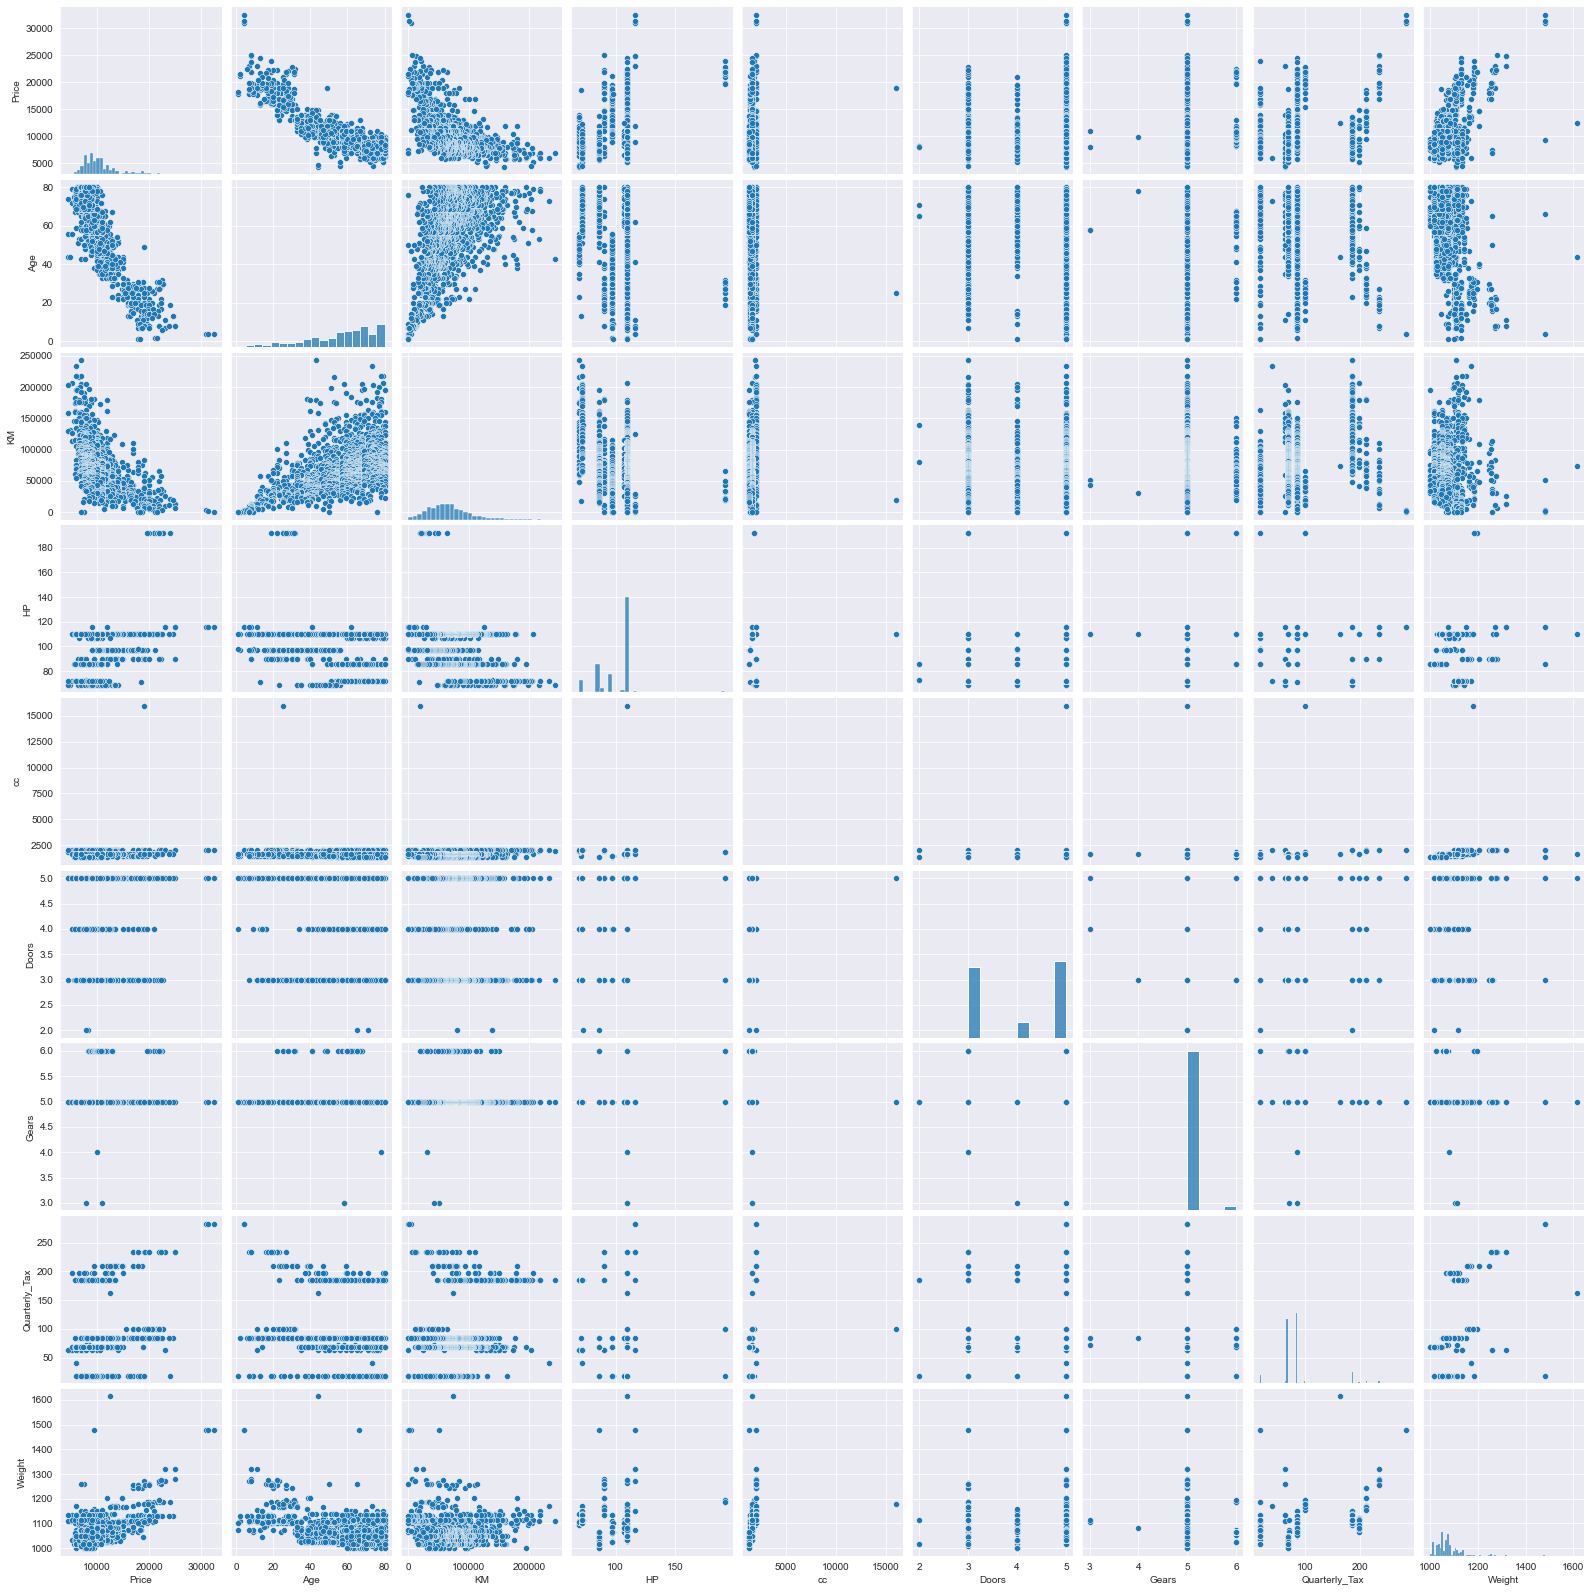

In [52]:
sns.set_style(style='darkgrid')
sns.pairplot(data6)

### Normalizing the data

In [53]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [54]:
data6.head().values

array([[13500,    23, 46986,    90,  2000,     3,     5,   210,  1165],
       [13750,    23, 72937,    90,  2000,     3,     5,   210,  1165],
       [13950,    24, 41711,    90,  2000,     3,     5,   210,  1165],
       [14950,    26, 48000,    90,  2000,     3,     5,   210,  1165],
       [13750,    30, 38500,    90,  2000,     3,     5,   210,  1170]],
      dtype=int64)

In [55]:
array = data6.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.33 0.28 0.19 0.17 0.05]
 [0.33 0.28 0.3  0.17 0.05]
 [0.34 0.29 0.17 0.17 0.05]
 [0.38 0.32 0.2  0.17 0.05]
 [0.33 0.37 0.16 0.17 0.05]]


In [56]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array = data6.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.76 -1.77 -0.57 -0.77  1.   -1.09 -0.14  2.99  1.76]
 [ 0.83 -1.77  0.12 -0.77  1.   -1.09 -0.14  2.99  1.76]
 [ 0.89 -1.72 -0.72 -0.77  1.   -1.09 -0.14  2.99  1.76]
 [ 1.16 -1.61 -0.55 -0.77  1.   -1.09 -0.14  2.99  1.76]
 [ 0.83 -1.4  -0.8  -0.77  1.   -1.09 -0.14  2.99  1.85]]


# Preparing a Model

## Build Model

In [57]:
model_toyo=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data6).fit()

In [58]:
model_toyo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:13:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Coeficients

In [59]:
model_toyo.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

## t-values and p-values

In [60]:
print(model_toyo.tvalues,'\n',model_toyo.pvalues)

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


## R-squared value

In [61]:
print(model_toyo.rsquared,model_toyo.rsquared_adj)

0.8637627463428191 0.8629989775766962


## Q-Q Plot

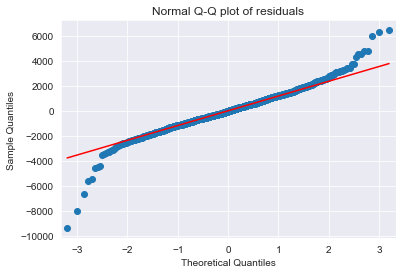

In [62]:
qqplot=sm.qqplot(model_toyo.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

## Residual Plot

eval_env: 1


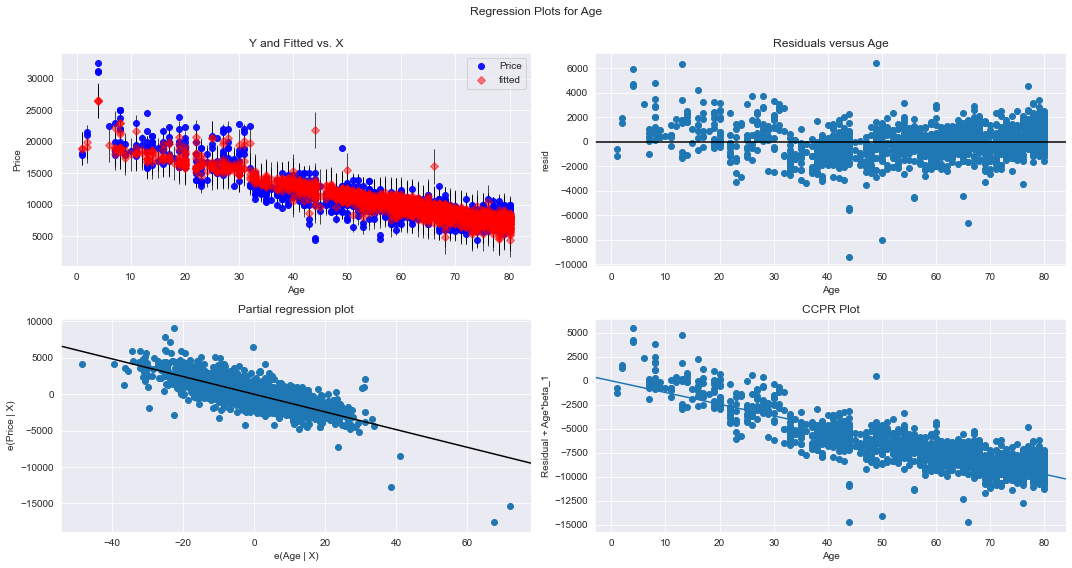

In [63]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"Age",fig=fig)
plt.show()

eval_env: 1


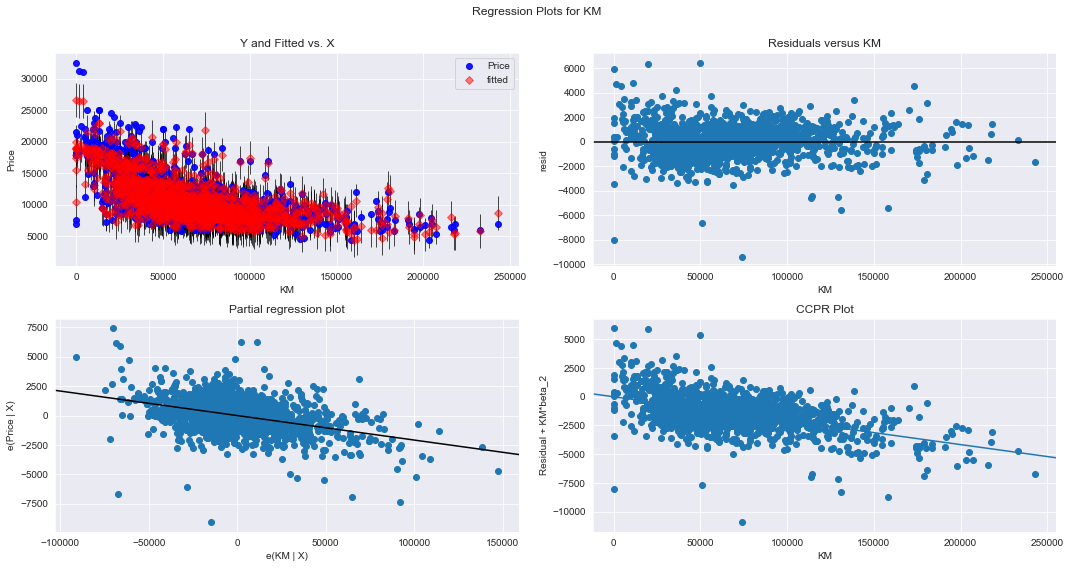

In [64]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"KM",fig=fig)
plt.show()

eval_env: 1


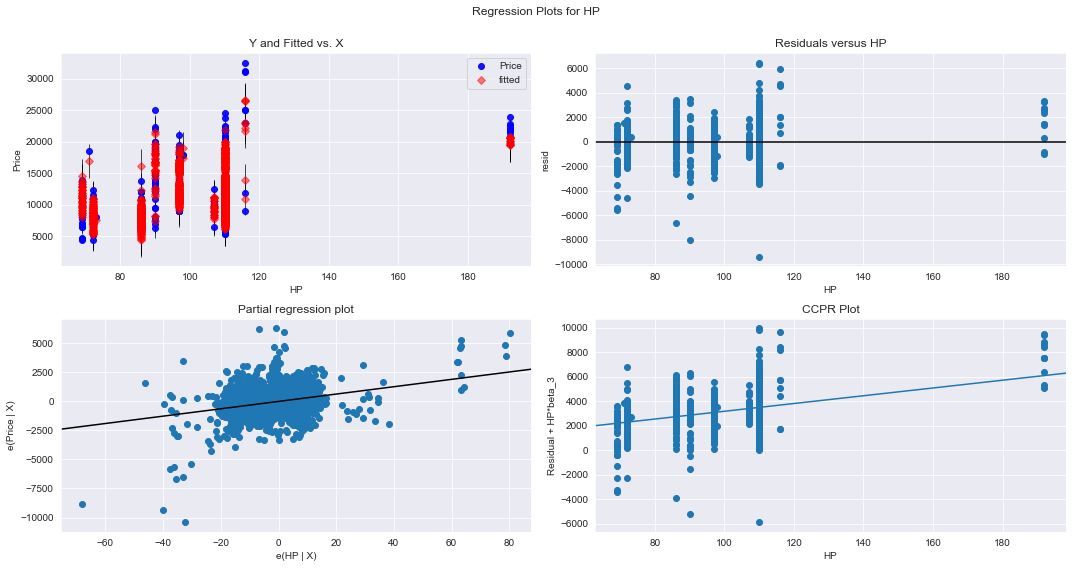

In [65]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"HP",fig=fig)
plt.show()

eval_env: 1


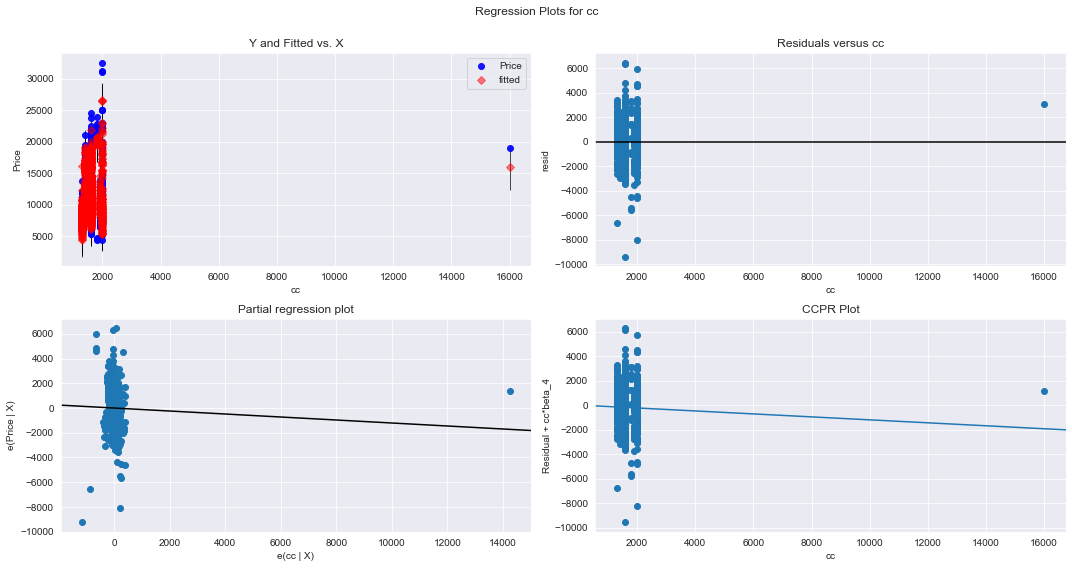

In [66]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"cc",fig=fig)
plt.show()

eval_env: 1


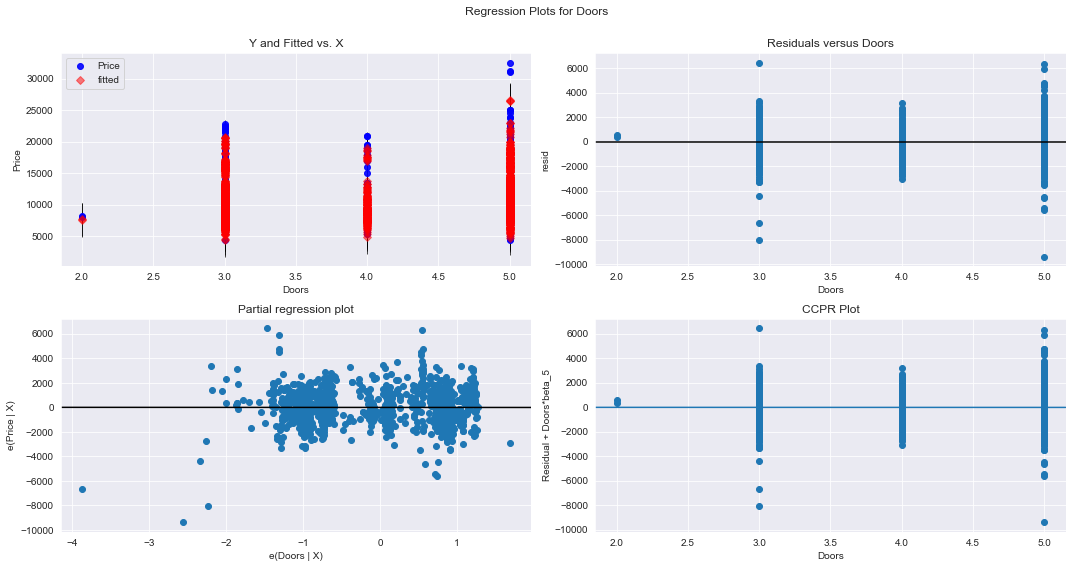

In [67]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"Doors",fig=fig)
plt.show()

eval_env: 1


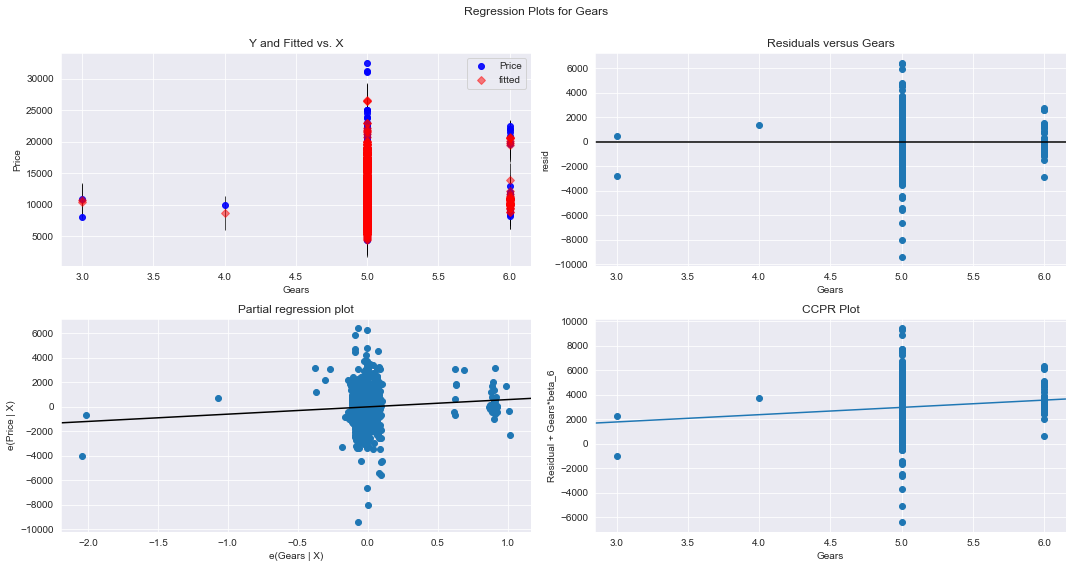

In [68]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"Gears",fig=fig)
plt.show()

eval_env: 1


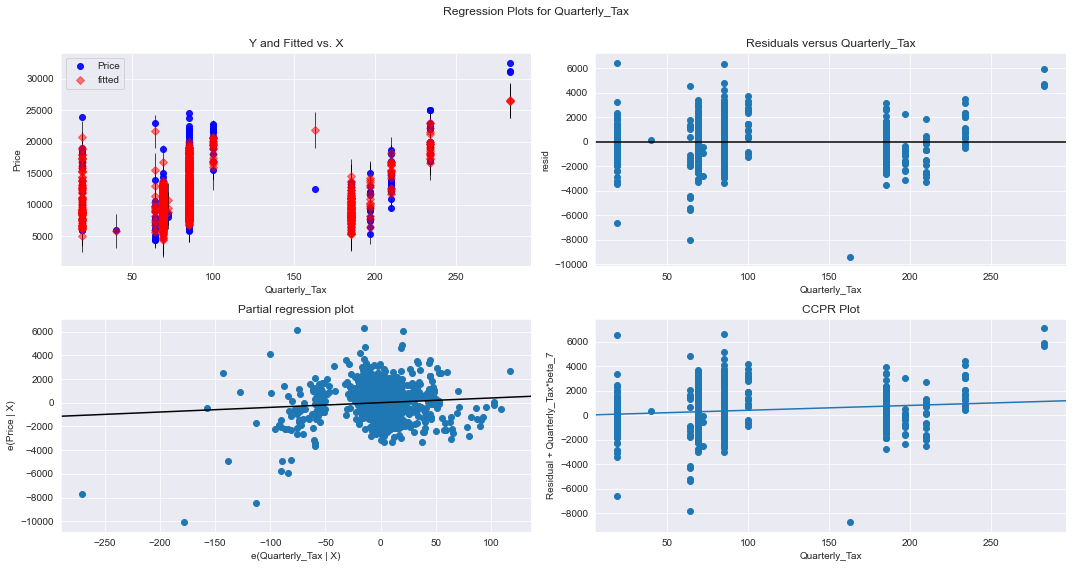

In [69]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"Quarterly_Tax",fig=fig)
plt.show()

eval_env: 1


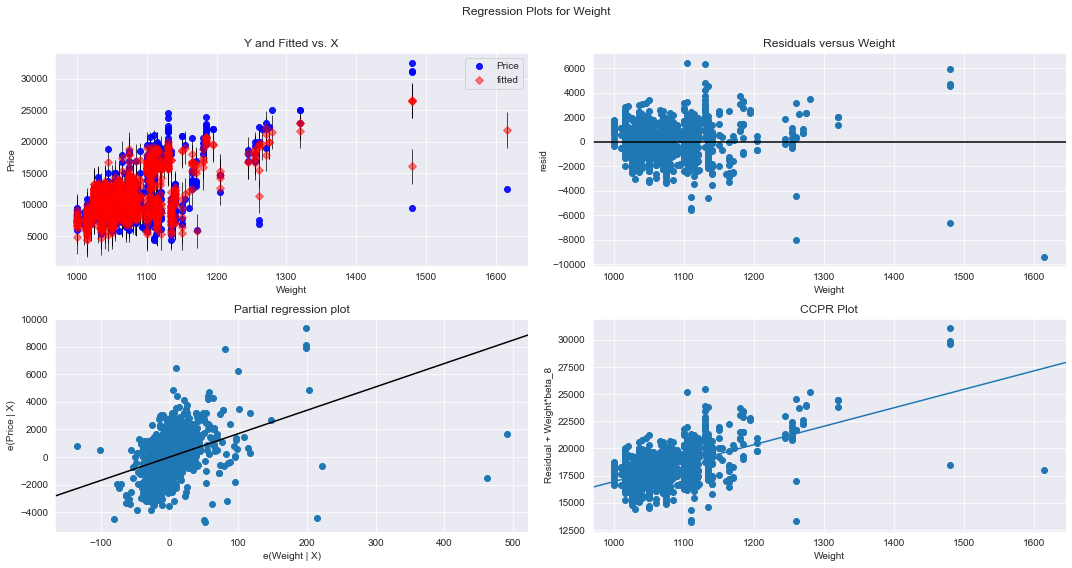

In [70]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model_toyo,"Weight",fig=fig)
plt.show()

### therefore from above residual plot we discard doors as it has straight line.

## Detecting Outliers

## Cooks's Distance

In [71]:
model_toyo_inf=model_toyo.get_influence()
(c,_t)=model_toyo_inf.cooks_distance

## Plot the influencers value using stem plot

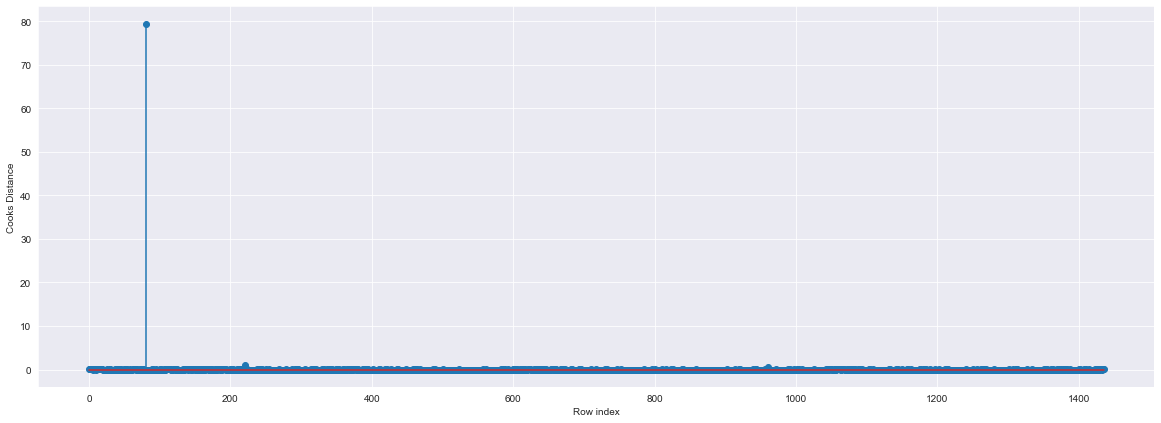

In [72]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Index and value of influencer where c is more than .5

In [73]:
(np.argmax(c),np.max(c))

(80, 79.52010624139538)

## High influence point

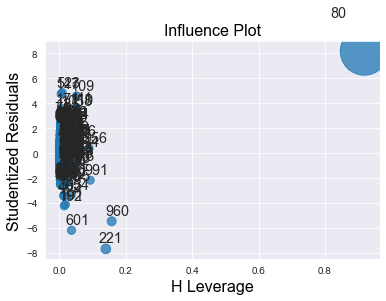

In [74]:
influence_plot(model_toyo)
plt.show()

In [75]:
data6[data6.index.isin([79,80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


In [76]:
df6=data6.drop(data6.index[80],axis=0)
df6.iloc[79:82,:]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
79,14900,30,22000,97,1400,5,5,85,1110
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110


In [77]:
data7=df6.reset_index()
data7.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [78]:
data8=data7.drop(['index'],axis=1)
data8.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [79]:
final_model_toyo=smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data8).fit()

In [80]:
final_model_toyo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:14:02   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age            -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking accuracy of model

In [81]:
print(final_model_toyo.rsquared,final_model_toyo.rsquared_adj)

0.8693349475698541 0.8686939837527475


## Since r-squared value is greater than 0.8 i.e., 0.87, hence it is a good model.